This exercise will require you to pull some data from the Qunadl API. Qaundl is currently the most widely used aggregator of financial market data.

As a first step, you will need to register a free account on the http://www.quandl.com website.

After you register, you will be provided with a unique API key, that you should store:

In [ ]:
# Store the API key as a string - according to PEP8, constants are always named in all upper case
#API_KEY = ''

Qaundl has a large number of data sources, but, unfortunately, most of them require a Premium subscription. Still, there are also a good number of free datasets.

For this mini project, we will focus on equities data from the Frankfurt Stock Exhange (FSE), which is available for free. We'll try and analyze the stock prices of a company called Carl Zeiss Meditec, which manufactures tools for eye examinations, as well as medical lasers for laser eye surgery: https://www.zeiss.com/meditec/int/home.html. The company is listed under the stock ticker AFX_X.

You can find the detailed Quandl API instructions here: https://docs.quandl.com/docs/time-series

While there is a dedicated Python package for connecting to the Quandl API, we would prefer that you use the *requests* package, which can be easily downloaded using *pip* or *conda*. You can find the documentation for the package here: http://docs.python-requests.org/en/master/ 

Finally, apart from the *requests* package, you are encouraged to not use any third party Python packages, such as *pandas*, and instead focus on what's available in the Python Standard Library (the *collections* module might come in handy: https://pymotw.com/3/collections/ ).
Also, since you won't have access to DataFrames, you are encouraged to us Python's native data structures - preferably dictionaries, though some questions can also be answered using lists.
You can read more on these data structures here: https://docs.python.org/3/tutorial/datastructures.html

Keep in mind that the JSON responses you will be getting from the API map almost one-to-one to Python's dictionaries. Unfortunately, they can be very nested, so make sure you read up on indexing dictionaries in the documentation provided above.

In [ ]:
# First, import the relevant modules

#import requests

In [ ]:
# Now, call the Quandl API and pull out a small sample of the data (only one day) to get a glimpse
# into the JSON structure that will be returned


In [ ]:
# Inspect the JSON structure of the object you created, and take note of how nested it is,
# as well as the overall structure
#json_data = r.json()

These are your tasks for this mini project:

1. Collect data from the Franfurt Stock Exchange, for the ticker AFX_X, for the whole year 2017 (keep in mind that the date format is YYYY-MM-DD).
2. Convert the returned JSON object into a Python dictionary.
3. Calculate what the highest and lowest opening prices were for the stock in this period.
4. What was the largest change in any one day (based on High and Low price)?
5. What was the largest change between any two days (based on Closing Price)?
6. What was the average daily trading volume during this year?
7. (Optional) What was the median trading volume during this year. (Note: you may need to implement your own function for calculating the median.)

# Exploring Twitter API


__Working with twitter api instead as the data from quandl api is no longer free__

In [3]:
CONSUMER_KEY = ""
CONSUMER_SECRET = ""

ACCESS_TOKEN = ""
ACCESS_TOKEN_SECRET = ""

In [ ]:
#!pip install tweepy


In [4]:
# Import package
from tweepy.streaming import StreamListener
from tweepy import OAuthHandler
from tweepy import Stream
import json


tweet_list = []
class MyStreamListener(StreamListener):
    def __init__(self, api=None):
        super(MyStreamListener, self).__init__()
        self.num_tweets = 0
        self.file = open("tweets.txt", "w")
    def on_status(self, status):
        tweet = status._json
        self.file.write(json.dumps(tweet) + '\n')
        tweet_list.append(status)
        self.num_tweets += 1
        if self.num_tweets < 100:
            return True
        else:
            return False
        self.file.close()

# Pass OAuth details to tweepy's OAuth handler
auth = OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
auth.set_access_token(ACCESS_TOKEN, ACCESS_TOKEN_SECRET)

# Initialize Stream listener
l = MyStreamListener()

# Create you Stream object with authentication
stream = Stream(auth, l)


# Filter Twitter Streams to capture data by the keywords:
stream.filter(track=['hillary clinton', 'donald trump', 'bernie sanders', 'ted cruz'])

# Loading and Exploring the twitter data

In [19]:
# Assiging file name to a variable
data_path = 'tweets.txt'

# Initializing empty list to store tweets
tweets_data = []

# Open connection to file
tweets_file = open(data_path, "r")

# Loading tweets and then appending them to the empty list
for line in tweets_file:
    tweet = json.loads(line)
    tweets_data.append(tweet)

# Close connection to file
tweets_file.close()

# Printing the keys of a tweet
print(tweets_data[0].keys())

dict_keys(['created_at', 'id', 'id_str', 'text', 'source', 'truncated', 'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place', 'contributors', 'retweeted_status', 'is_quote_status', 'quote_count', 'reply_count', 'retweet_count', 'favorite_count', 'entities', 'favorited', 'retweeted', 'filter_level', 'lang', 'timestamp_ms'])


# Creating a DataFrame for our tweets data

We have a list of dictionaries, where each dictionary corresponds to a single tweet. I will extract the text, language for each tweet.

In [20]:
# Import package
import pandas as pd


df = pd.DataFrame(tweets_data, columns= ['text', 'lang'])

print(df.head())


                                                text lang
0  RT @OhNoSheTwitnt: Huckabee’s son killed a dog...   en
1  RT @newsmax: Thirty percent of GOP voters beli...   en
2  RT @BillKristol: “An unofficial bipartisan ele...   en
3  RT @realDailyWire: Sen. Ted Cruz Says Critical...   en
4                                              Amen.   en


# Text Analysis

We have a DataFrame of tweets, so now I am going to do some text analysis to count how many tweets contain the words ' hillary clinton', 'donald trump', 'bernie sanders' and 'ted cruz'. 

In [21]:
# Checking whether the word occurs in a tweet

import re

def word_in_text(word, text):
    word = word.lower()
    text = text.lower()
    match = re.search(word, text)

    if match:
        return True
    return False

In [15]:
# Initializing list to store tweet counts
[clinton, trump, sanders, cruz] = [0, 0, 0, 0]

#Counting the number of tweets in which each candidate is mentioned
for index, row in df.iterrows():
    clinton += word_in_text('hillary clinton', row['text'])
    trump += word_in_text('donald trump', row['text'])
    sanders += word_in_text('bernie sanders', row['text'])
    cruz += word_in_text('ted cruz', row['text'])

In [17]:
print('hillary clinton:', clinton)
print('donald trump:', trump)
print('bernie sanders:', sanders)
print('ted cruz:', cruz)

hillary clinton: 7
donald trump: 37
bernie sanders: 4
ted cruz: 6


# Plotting the twitter data

Now that we have the number of tweets that each candidate was mentioned in, We can plot a bar chart of this data.

C:\Users\Taimoor\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


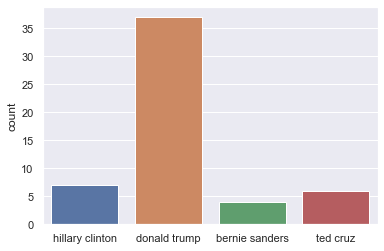

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(color_codes=True)

# Creating a list of labels
labels = ['hillary clinton', 'donald trump', 'bernie sanders', 'ted cruz']

# Plot the bar chart
ax = sns.barplot(labels, [clinton, trump, sanders, cruz])
ax.set(ylabel="count")
plt.show()
